Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [4]:
movies_df.drop(['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline'], axis = 1, inplace = True)

#### Remove any duplicate rows

In [5]:
movies_df.drop_duplicates(inplace = True)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [7]:
# Change the release_date column to DateTime

# convert the 'Date' column to datetime format
movies_df['release_date']= pd.to_datetime(movies_df['release_date'])
 
# Extract the release year from every release date
movies_df['Year'] =  movies_df['release_date'].dt.year 

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [8]:
movies_df = movies_df.astype({'budget': 'int', 'revenue':'int'})

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [9]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [10]:
# Inspect flattened data
movies_df.sample(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,Year
933,50000000,"['Action', 'Adventure', 'Comedy', 'Western']",6038,16.251204,"['Hong Kong', 'United States of America']",2003-02-06,88323487,115.0,"['English', '普通话']",Shanghai Knights,6.0,692,2003
303,100000000,"['Action', 'Crime']",314,32.271938,['United States of America'],2004-07-22,82102379,104.0,"['Español', 'English']",Catwoman,4.2,808,2004
2611,15000000,"['Drama', 'Comedy', 'Romance']",16222,8.074807,['United States of America'],2000-03-31,9902115,94.0,['English'],Whatever It Takes,5.0,37,2000
527,53000000,"['Comedy', 'Crime']",4551,18.614720,['United States of America'],2005-03-04,95226116,118.0,"['English', 'Pусский']",Be Cool,5.4,292,2005
2734,16000000,['Drama'],339984,10.248439,['United States of America'],2016-03-17,77000000,117.0,['English'],Miracles from Heaven,6.7,186,2016


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [11]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]
action_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,Year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,230000,"['Drama', 'Action', 'Crime']",18533,18.450613,['United Kingdom'],2008-10-09,2260712,92.0,['English'],Bronson,6.9,733,2008
4670,400000,"['Adventure', 'Action', 'Thriller', 'Science F...",9659,33.142185,['Australia'],1979-04-12,100000000,93.0,['English'],Mad Max,6.6,1213,1979
4701,150000,"['Action', 'Drama', 'Romance']",5822,0.132878,['United States of America'],1971-04-23,15200000,97.0,['English'],Sweet Sweetback's Baadasssss Song,4.6,18,1971
4772,31192,"['Drama', 'Action', 'Comedy']",42151,1.330379,['United Kingdom'],2009-09-01,10000,89.0,['English'],Down Terrace,6.3,26,2009


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
# Code here
expensive_movies = movies_df.nlargest(5, 'budget')
cheapest_movies = movies_df.nsmallest(5, 'budget')

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [13]:
# Code here
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

profitable_movies = movies_df.nlargest(5, 'profit')
print(f"Top profitable movies: {profitable_movies}")


Top profitable movies:        budget                                             genres      id  \
0   237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
25  200000000                   ['Drama', 'Romance', 'Thriller']     597   
28  150000000  ['Action', 'Adventure', 'Science Fiction', 'Th...  135397   
44  190000000                                         ['Action']  168259   
16  220000000         ['Science Fiction', 'Action', 'Adventure']   24428   

    popularity                            production_countries release_date  \
0   150.437577  ['United States of America', 'United Kingdom']   2009-12-10   
25  100.025899                    ['United States of America']   1997-11-18   
28  418.708552                    ['United States of America']   2015-06-09   
44  102.322217           ['Japan', 'United States of America']   2015-04-01   
16  144.448633                    ['United States of America']   2012-04-25   

       revenue  runtime                      

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [14]:
# Code here
popularity_movies = movies_df.nlargest(5, 'popularity')
popularity_movies


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,Year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


#### Find Movies which are rated above 7

In [15]:
# Code here

rate = movies_df[movies_df['vote_average'] > 7]
print(rate)


         budget                                             genres     id  \
0     237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...  19995   
3     250000000           ['Action', 'Crime', 'Drama', 'Thriller']  49026   
6     260000000                            ['Animation', 'Family']  38757   
7     280000000         ['Action', 'Adventure', 'Science Fiction']  99861   
8     250000000                 ['Adventure', 'Fantasy', 'Family']    767   
...         ...                                                ...    ...   
4713     160000                         ['Documentary', 'History']   1779   
4724      10000  ['Drama', 'Fantasy', 'Horror', 'Science Fiction']    985   
4738      60000                   ['Mystery', 'Drama', 'Thriller']    473   
4773      27000                                         ['Comedy']   2292   
4792      20000         ['Crime', 'Horror', 'Mystery', 'Thriller']  36095   

      popularity                            production_countries release_da

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

Text(0.5, 0, 'Frequency')

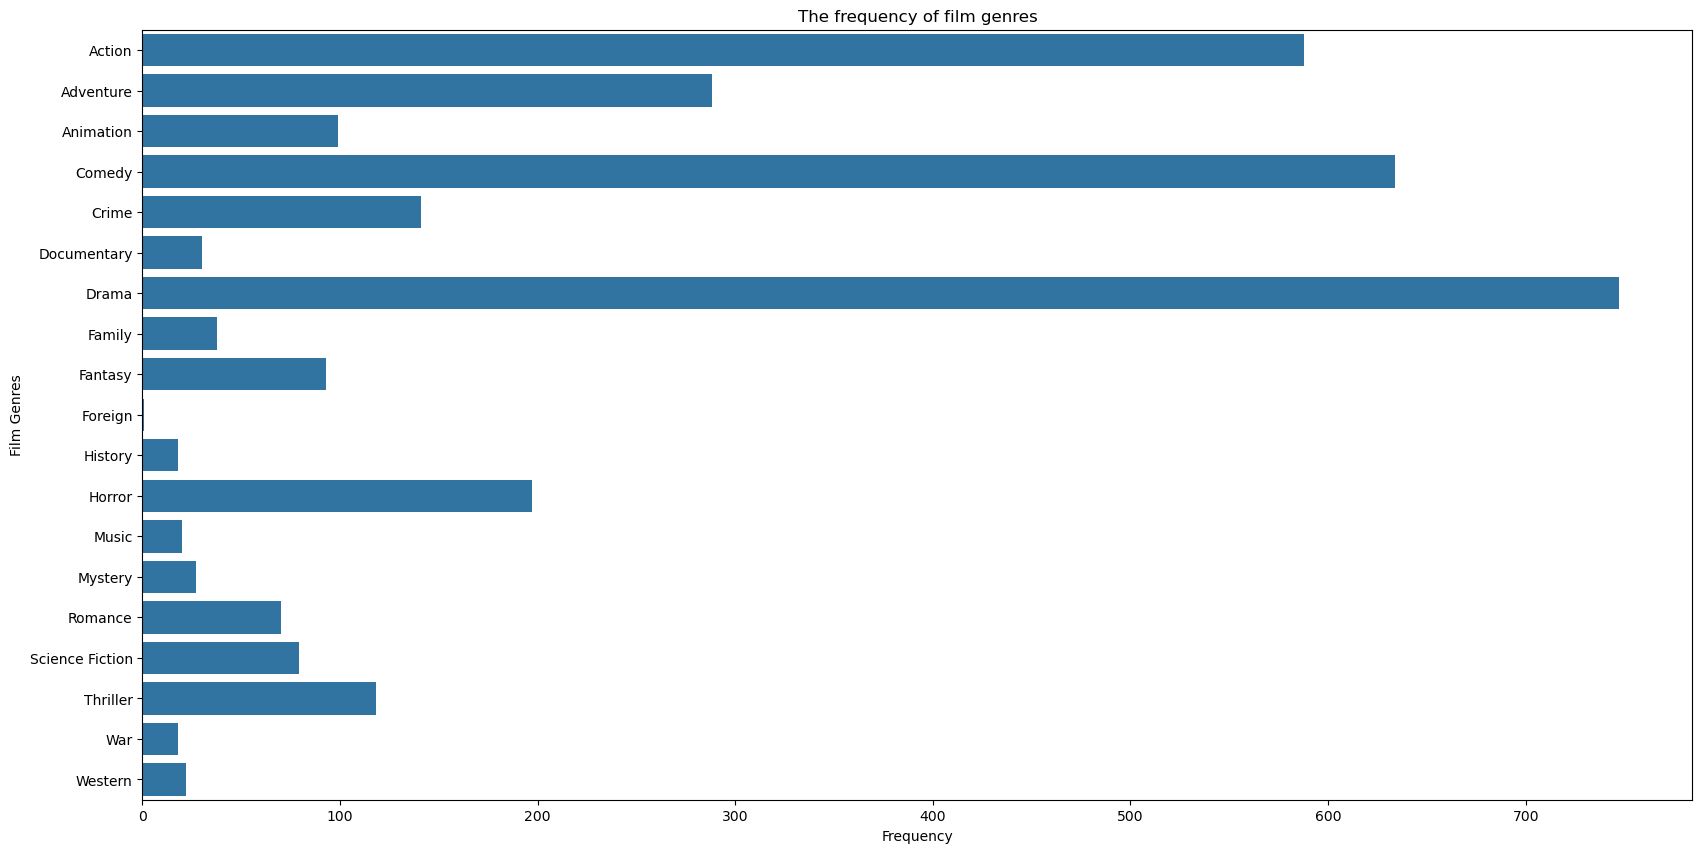

In [18]:
# Generate three different interesting visualisations with a data story.

# Most successful genres — create a bar plot explaining the frequency of movies in each genre.
genres_list = movies_df['genres'].to_list()
genres_list_1 = []
for item in genres_list:
    i = item.split(',')[0].strip().replace("'","").replace('[','').replace(']','')
    genres_list_1.append(i)
genres_list_1.remove('')
genres_df = pd.DataFrame(genres_list_1)
#print(genres_df)
gen_data = genres_df.pivot_table(index = [0], aggfunc ='size')
gen_dataframe = pd.DataFrame(gen_data)
#print(gen_dataframe)
film_genres = gen_dataframe.iloc[:,0]
frequency = gen_dataframe.index
plt.figure(figsize=(20,10))
sns.barplot(data=gen_dataframe, x=film_genres, y=frequency)
plt.title('The frequency of film genres')
plt.ylabel('Film Genres')
plt.xlabel('Frequency')


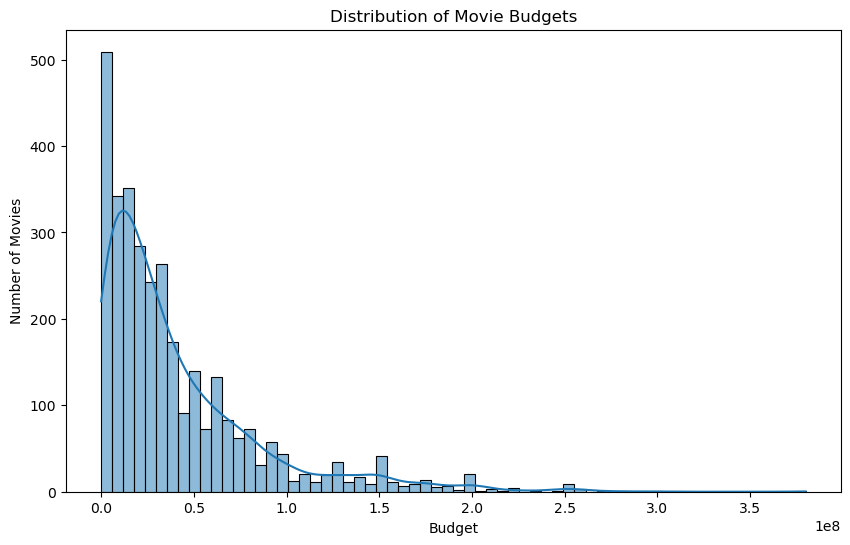

In [17]:
# Visualization example: Budget distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['budget'], kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Number of Movies')
plt.show()

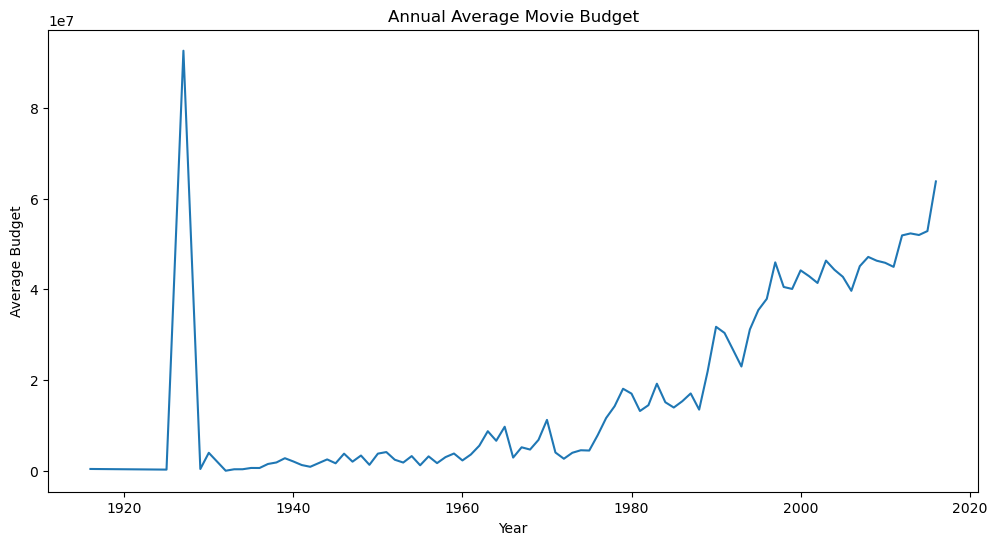

In [20]:
# Q3: Yearly trend of movie budgets
yearly_budget = movies_df.groupby(movies_df['release_date'].dt.year)['budget'].mean()
plt.figure(figsize=(12, 6))
yearly_budget.plot()
plt.title('Annual Average Movie Budget')
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.show()
